## 9_Sprint_9T02
### Aprenentatge Supervisat - Regressions
#### Eloi Canals

Exercici 1
Crea almenys tres models de regressió diferents per intentar predir el millor possible l’endarreriment dels vols (ArrDelay) de DelayedFlights.csv.

#### Carreguem llibreries i el dataframe a operar

In [1]:
import pandas as pd
import matplotlib.pyplot as plt #, mpld3
import numpy as np
import seaborn as sns

# sklearn
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA

df = pd.read_csv('DelayedFlights.csv', index_col=0)



/Users/ecanals/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [2]:
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [3]:
df['ArrDelay'].describe

<bound method NDFrame.describe of 0         -14.0
1           2.0
2          14.0
4          34.0
5          11.0
           ... 
7009710    25.0
7009717    75.0
7009718    99.0
7009726     9.0
7009727    -5.0
Name: ArrDelay, Length: 1936758, dtype: float64>

In [4]:
# Comprovem que el dataset no te NaNs
display(df.isna().sum().to_frame().T)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,0,0,0,0,0,7110,0,0,0,...,7110,455,0,0,0,689270,689270,689270,689270,689270


In [5]:
# Num of NaNs acceptablement baix. Get rid of NaNs
df_drop = df.dropna()

In [6]:
df_drop.describe()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,1247486.0,1.247486e+06,1.247486e+06,1.247486e+06,1.247486e+06,1.247486e+06,1.247486e+06,1.247486e+06,1.247486e+06,1.247486e+06,...,1.247486e+06,1.247486e+06,1.247486e+06,1247486.0,1247486.0,1.247486e+06,1.247486e+06,1.247486e+06,1.247486e+06,1.247486e+06
mean,2008.0,6.065399e+00,1.572542e+01,3.980082e+00,1.558832e+03,1.487949e+03,1.616749e+03,1.652458e+03,2.276526e+03,1.353779e+02,...,7.415867e+02,7.297232e+00,2.066033e+01,0.0,0.0,1.917943e+01,3.703355e+00,1.502162e+01,9.013728e-02,2.529649e+01
std,0.0,3.508937e+00,8.793008e+00,1.993270e+00,4.543300e+02,4.211782e+02,5.839416e+02,4.617372e+02,1.997547e+03,7.229636e+01,...,5.593643e+02,6.033239e+00,1.667983e+01,0.0,0.0,4.354624e+01,2.149153e+01,3.383308e+01,2.022716e+00,4.205489e+01
min,2008.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.400000e+01,...,1.100000e+01,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2008.0,3.000000e+00,8.000000e+00,2.000000e+00,1.232000e+03,1.150000e+03,1.326000e+03,1.340000e+03,6.370000e+02,8.300000e+01,...,3.340000e+02,4.000000e+00,1.100000e+01,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2008.0,6.000000e+00,1.600000e+01,4.000000e+00,1.618000e+03,1.529000e+03,1.737000e+03,1.722000e+03,1.589000e+03,1.180000e+02,...,5.950000e+02,6.000000e+00,1.600000e+01,0.0,0.0,2.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,8.000000e+00
75%,2008.0,9.000000e+00,2.300000e+01,6.000000e+00,1.924000e+03,1.830000e+03,2.048000e+03,2.022000e+03,3.676000e+03,1.670000e+02,...,9.720000e+02,8.000000e+00,2.400000e+01,0.0,0.0,2.100000e+01,0.000000e+00,1.500000e+01,0.000000e+00,3.300000e+01
max,2008.0,1.200000e+01,3.100000e+01,7.000000e+00,2.400000e+03,2.359000e+03,2.400000e+03,2.359000e+03,9.741000e+03,1.114000e+03,...,4.962000e+03,2.400000e+02,4.220000e+02,0.0,0.0,2.436000e+03,1.352000e+03,1.357000e+03,3.920000e+02,1.316000e+03


#### Model de Regressió 1. Regressió Lineal Simple

In [7]:
# Separem els predictors dels resultat supervisat

# Testejarem si el dia de la setmana te alguna relació amb els retards
#df_predictor = df[['DayOfWeek','Year']]
df_predictor = df_drop[['DayOfWeek']]

# El supervisor sera els retards
#df_supervisator = df[['ArrDelay','Year']]
df_supervisator = df_drop[['ArrDelay']]

In [8]:
# normalitzem les dades
scaler = RobustScaler()
predictor_std = pd.DataFrame(scaler.fit_transform(df_predictor.values)).round(2)

supervisator_std = pd.DataFrame(scaler.fit_transform(df_supervisator.values)).round(2)

In [9]:
# Carreguem les llibreries per crear els grups de entrenament i test
from sklearn.model_selection import train_test_split

In [10]:
# Creem els 4 grups (2X,2y)
X=predictor_std
y=supervisator_std

X_train, X_test, y_train, y_test = train_test_split (X, y, test_size= 0.3, random_state=111)


In [11]:
predictor_std.describe()

,0
count,1.247486e+06
mean,-4.979415e-03
std,4.983174e-01
min,-7.500000e-01
25%,-5.000000e-01
50%,0.000000e+00
75%,5.000000e-01
max,7.500000e-01


In [12]:
supervisator_std.describe()

,0
count,1.247486e+06
mean,3.827717e-01
std,1.146358e+00
min,-5.300000e-01
25%,-3.200000e-01
50%,0.000000e+00
75%,6.800000e-01
max,4.562000e+01


In [13]:
# Comprovem que el datasets de treball no tenen NaNs
display(predictor_std.isna().sum().to_frame().T)

,0
0,0


In [14]:
# Comprovem que el datasets de treball no tenen NaNs
display(supervisator_std.isna().sum().to_frame().T)

,0
0,0


In [15]:
display(supervisator_std.isna().sum().to_frame().T)

,0
0,0


In [16]:
# 1.Regressió lineal Simple
from sklearn.linear_model import LinearRegression

#### Creem el model i l'entrenem

In [17]:
model_lrs = LinearRegression()
model_lrs.fit(X_train, y_train)

# Prediccions
test_predictions = model_lrs.predict(X_test)
test_predictions

array([[0.38916789],
       [0.36824319],
       [0.36824319],
       ...,
       [0.39614279],
       [0.38219299],
       [0.36126829]])

In [18]:
# Level of accuracy LRS
print("R^2 value: ",model_lrs.score(X,y))
print("Coeficient Factor: ", model_lrs.coef_)
print ("Intercept:", model_lrs.intercept_)

R^2 value:  0.00014121454871340866
Coeficient Factor:  [[0.02789959]]
Intercept: [0.38219299]


In [19]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor

MAE = mean_absolute_error(y_test, test_predictions)
MSE = mean_squared_error(y_test, test_predictions)
RMSE = np.sqrt(MSE)

print(MAE,MSE,RMSE)

0.7608108279681104 1.329881765167558 1.1532049970267897


#### Fem el Cross Validation per comprovar

In [20]:
# Fem el cross validation per comprovar si tenim o no overfitting
from sklearn.model_selection import train_test_split, cross_val_score, validation_curve

rate1 = 0.005
rate2 = 0.1
mlpr = MLPRegressor(hidden_layer_sizes=(12,10), max_iter=700, learning_rate_init=rate1)
scores = cross_val_score(mlpr, X, y, cv=5)
print(scores)

/Users/ecanals/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ecanals/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ecanals/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ecanals/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

[-0.0012962  -0.00379338  0.00037261 -0.00269    -0.0008263 ]


#### 2.Regressió lineal Multiple MLR

#### Utilitzarem les columnes Origin, Origin Delay per veure si podem predir correctament l'endarreriment dels vols depenent de l'origen del vol.

In [21]:
mlr_df = df_drop[['DepDelay','Origin']]
mlr_df.head()

,DepDelay,Origin
4,34.0,IND
6,67.0,IND
11,94.0,IND
16,27.0,IND
18,28.0,IND


In [22]:
# Conversió de Origin a numerics
dummies = pd.get_dummies(mlr_df['Origin'])
dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1247486 entries, 4 to 7009718
Columns: 302 entries, ABE to YUM
dtypes: uint8(302)
memory usage: 368.8 MB


In [23]:
# Merge dels dataframes dummies amb el df original
mlr_expanded = pd.concat([mlr_df,dummies], axis=1)
mlr_expanded.head()

,DepDelay,Origin,ABE,ABI,ABQ,ABY,ACK,ACT,ACV,ACY,...,TYR,TYS,VLD,VPS,WRG,WYS,XNA,YAK,YKM,YUM
4,34.0,IND,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,67.0,IND,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,94.0,IND,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16,27.0,IND,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18,28.0,IND,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
# Eliminar Origin original tipus text
mlr_expanded = mlr_expanded.drop('Origin',axis=1)

In [25]:
mlr_expanded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1247486 entries, 4 to 7009718
Columns: 303 entries, DepDelay to YUM
dtypes: float64(1), uint8(302)
memory usage: 378.3 MB


In [26]:
mlr_expanded.dtypes

DepDelay    float64
ABE           uint8
ABI           uint8
ABQ           uint8
ABY           uint8
             ...   
WYS           uint8
XNA           uint8
YAK           uint8
YKM           uint8
YUM           uint8
Length: 303, dtype: object

In [27]:
mlr_expanded.columns

Index(['DepDelay', 'ABE', 'ABI', 'ABQ', 'ABY', 'ACK', 'ACT', 'ACV', 'ACY',
       'ADK',
       ...
       'TYR', 'TYS', 'VLD', 'VPS', 'WRG', 'WYS', 'XNA', 'YAK', 'YKM', 'YUM'],
      dtype='object', length=303)

In [28]:
# Normalitzem el df
mlr_std = pd.DataFrame(scaler.fit_transform(mlr_expanded.values))
mlr_std

,0,1,2,3,4,5,6,7,8,9,...,293,294,295,296,297,298,299,300,301,302
0,-0.137255,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.509804,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.039216,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.274510,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.254902,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1247481,0.196078,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1247482,-0.176471,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1247483,-0.215686,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1247484,0.313725,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
# Creem els 4 grups (2X,2y)
X_lrm =mlr_std
y_lrm=supervisator_std

X_train, X_test, y_train, y_test = train_test_split (X_lrm, y_lrm, test_size= 0.3, random_state=111)

In [30]:
model_lrm = LinearRegression()
model_lrm.fit(X_train, y_train)

# Prediccions
test_predictions = model_lrm.predict(X_test)
test_predictions

array([[-0.03406787],
       [-0.5025003 ],
       [ 0.35984659],
       ...,
       [ 0.06649375],
       [ 0.23618865],
       [-0.39358997]])

In [31]:
# Level of accuracy LRM
print("R^2 value: ",model_lrm.score(X_lrm,y_lrm))
print("Coeficient Factor: ", model_lrm.coef_)
print ("Intercept:", model_lrm.intercept_)

R^2 value:  0.9050801227166257
Coeficient Factor:  [[ 9.25739146e-01 -1.76261878e+09 -1.76261878e+09 -1.76261878e+09
  -1.76261878e+09 -1.76261878e+09 -1.76261878e+09 -1.76261878e+09
  -1.76261878e+09 -1.76261878e+09 -1.76261878e+09 -1.76261878e+09
  -1.76261878e+09 -1.76261878e+09 -1.76261878e+09 -1.76261878e+09
  -1.76261878e+09 -1.76261878e+09 -1.76261878e+09 -1.76261878e+09
  -1.76261878e+09 -1.76261878e+09 -1.76261878e+09 -1.76261878e+09
  -1.76261878e+09 -1.76261878e+09 -1.76261878e+09 -1.76261878e+09
  -1.76261878e+09 -1.76261878e+09 -1.76261878e+09 -1.76261878e+09
  -1.76261878e+09 -1.76261878e+09 -1.76261878e+09 -1.76261878e+09
  -1.76261878e+09 -1.76261878e+09 -1.76261878e+09 -1.76261878e+09
  -1.76261878e+09 -1.76261878e+09 -1.76261878e+09 -1.76261878e+09
  -1.76261878e+09 -1.76261878e+09 -1.76261878e+09 -1.76261878e+09
  -1.76261878e+09 -1.76261878e+09 -1.76261878e+09 -1.76261878e+09
  -1.76261878e+09 -1.76261878e+09 -1.76261878e+09 -1.76261878e+09
  -1.76261878e+09 -1.7626

Exercici 2
Compara’ls en base al MSE i al R2.

#### Si comparem  entre la regressió lineal simple i la regressió multiple, veiem que el nivell d'acuracy r^2 serà molt més acurat en les prediccions si utilitzem regressió multiple.

In [32]:
# Level of accuracy LRS
print("R^2 value: ",model_lrs.score(X,y))
print("Coeficient Factor: ", model_lrs.coef_)
print ("Intercept:", model_lrs.intercept_)

R^2 value:  0.00014121454871340866
Coeficient Factor:  [[0.02789959]]
Intercept: [0.38219299]


#### 3. Regressió Logistica

In [33]:
df['ArrDelay']

0         -14.0
1           2.0
2          14.0
4          34.0
5          11.0
           ... 
7009710    25.0
7009717    75.0
7009718    99.0
7009726     9.0
7009727    -5.0
Name: ArrDelay, Length: 1936758, dtype: float64

#### Crearem una nova columna tipus binary per classificar el arrDelay:

- False. Vols amb un arrDelay 0 (no delay), negatiu (van arribar abans de temps) o amb un delay de cortesia màxim de 5min.
- True. Vols amb un arrDelay de mes de 5 minuts.

In [34]:
df_log = df

df_log['BinaryDelay']= df_log['ArrDelay'].apply(lambda x: True if (x > 5) else False) 

In [35]:
df_log['BinaryDelay'].describe()

count     1936758
unique          2
top          True
freq      1564823
Name: BinaryDelay, dtype: object

In [36]:
# Eliminem els NaNs detectats previament
df_log = df_log.dropna(subset=["ArrTime","TaxiIn","TaxiOut"])

In [37]:
df_log['BinaryDelay'].head()

0    False
1    False
2     True
4     True
5     True
Name: BinaryDelay, dtype: bool

In [38]:
df_log['BinaryDelay'].describe()

count     1929648
unique          2
top          True
freq      1564823
Name: BinaryDelay, dtype: object

In [39]:
df_log['BinaryDelay']

0          False
1          False
2           True
4           True
5           True
           ...  
7009710     True
7009717     True
7009718     True
7009726     True
7009727    False
Name: BinaryDelay, Length: 1929648, dtype: bool

In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
# Instanciem el model
logisticRegr = LogisticRegression()

In [43]:
## ABANS DE FER EL CONFUSION MATRIX:

# Fem sample de 10000 per no sobrecarregar la memoria
# i mirar que el valor estigui balancejat.

df_log = df_log.sample(n = 10000)

In [44]:
log_df_y = df_log[['BinaryDelay']]
log_df_y.head()

,BinaryDelay
4590668,True
3914950,False
2800796,True
1790558,True
2106196,True


In [45]:
# Seleccionem les features
feature_cols = ['DayofMonth','DayOfWeek','DepTime','CRSDepTime','ArrTime','CRSArrTime','DepDelay']

# OK log_predictor = df_log[feature_cols]
log_predictor = df_log[feature_cols]

In [46]:
log_predictor.columns

Index(['DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime', 'ArrTime',
       'CRSArrTime', 'DepDelay'],
      dtype='object')

In [47]:
log_predictor.dtypes

DayofMonth      int64
DayOfWeek       int64
DepTime       float64
CRSDepTime      int64
ArrTime       float64
CRSArrTime      int64
DepDelay      float64
dtype: object

In [48]:
log_supervisator = log_df_y

In [49]:
log_supervisator.dtypes

BinaryDelay    bool
dtype: object

Exercici 3
Entrena’ls utilitzant els diferents paràmetres que admeten.

In [50]:
# Creem els 4 grups (2X,2y)
X_log=log_predictor #error al pasarli el log_predictor
y_log=log_supervisator

X_train, X_test, y_train, y_test = train_test_split (X_log, y_log, test_size= 0.3, random_state=111)


In [51]:
logisticRegr.fit(X_train, y_train)

/Users/ecanals/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ecanals/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [52]:
# Evaluem el model amb confusion matrix
y_pred=logisticRegr.predict(X_test)

# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[ 225,  328],
       [ 160, 2287]])

Text(0.5, 257.44, 'Predicted label')

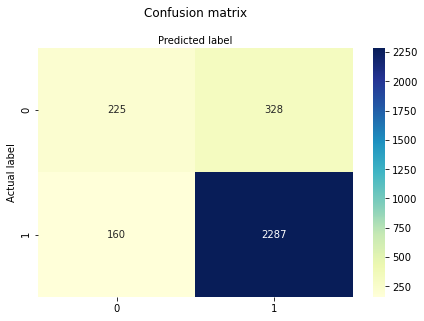

In [53]:
# Visualització del Confusion Matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [54]:
# Level of accuracy LogReg
print("R^2 value: ",logisticRegr.score(X_log,y_log))
print("Coeficient Factor: ", logisticRegr.coef_)
print ("Intercept:", logisticRegr.intercept_)

R^2 value:  0.8308
Coeficient Factor:  [[-1.99410428e-02 -3.44415495e-02  3.79103461e-05 -1.51876170e-04
   6.10026870e-05 -4.50950328e-04  1.52240654e-01]]
Intercept: [-0.06839974]


Exercici 4
Compara el seu rendiment utilitzant l’aproximació traint/test o utilitzant totes les dades (validació interna).

In [55]:
# Utilitzarem totes les dades numeriques del dataframe
# Seleccionem les features
feature_cols = ['Year','Month','DayofMonth','DayOfWeek','DepTime','CRSDepTime','ArrTime','CRSArrTime','DepDelay','ActualElapsedTime','CRSElapsedTime','AirTime','Distance','BinaryDelay']

# OK log_predictor = df_log[feature_cols]
log_predictor_all = df_log[feature_cols]

log_predictor_all = log_predictor_all.dropna()
log_supervisator_all = log_predictor_all[['BinaryDelay']]

In [56]:
# Creem els 4 grups (2X,2y)
X_log_all=log_predictor_all
y_log_all=log_supervisator_all

X_train, X_test, y_train, y_test = train_test_split (X_log_all, y_log_all, test_size= 0.3, random_state=111)

In [57]:
logisticRegr_all = LogisticRegression()

In [58]:
logisticRegr_all.fit(X_train, y_train)

/Users/ecanals/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ecanals/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [59]:
# Reevaluem el model amb confusion matrix
y_pred=logisticRegr_all.predict(X_test)

# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[ 430,  105],
       [ 116, 2347]])

Text(0.5, 257.44, 'Predicted label')

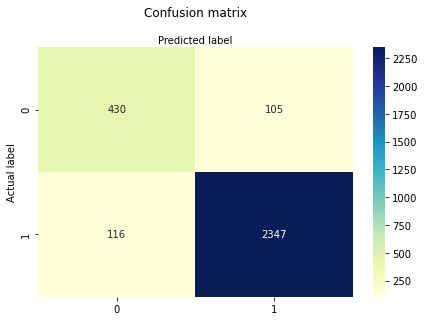

In [60]:
# Visualització del Confusion Matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [61]:
# Level of accuracy LogRegAllColumns
print("R^2 value: ",logisticRegr_all.score(X_log_all,y_log_all))
print("Coeficient Factor: ", logisticRegr_all.coef_)
print ("Intercept:", logisticRegr_all.intercept_)

R^2 value:  0.9275492844991494
Coeficient Factor:  [[-0.00270994 -0.00983157 -0.00525957 -0.00056147 -0.00166512  0.00282922
   0.00056776 -0.00127036  0.50298899  0.1850698  -0.17743517  0.03851015
  -0.00614469  0.02569102]]
Intercept: [-1.34958456e-06]


#### Veiem clarament que utilitzant totes les columnes millora el R^2

Exercici 5
Realitza algun procés d’enginyeria de variables per millorar-ne la predicció

#### Nota. Per poder utilitzar el Model de Regressió Logistica, ja s'ha aplicat anteriorment una feature engineering per convertir el  ArrDelay en valor de clasificació.

Exercici 6
No utilitzis la variable DepDelay a l’hora de fer prediccions.

In [62]:
# Eliminen DepDelay del dataframe
log_predictor2 = log_predictor.drop(columns='DepDelay')

In [63]:
# Creem els 4 grups (2X,2y)
X_log2=log_predictor2
y_log2=log_supervisator

X_train, X_test, y_train, y_test = train_test_split (X_log2, y_log2, test_size= 0.3, random_state=111)

In [64]:
logisticRegr2 = LogisticRegression()

In [65]:
logisticRegr2.fit(X_train, y_train)

/Users/ecanals/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

In [66]:
# Reevaluem el model amb confusion matrix
y_pred=logisticRegr2.predict(X_test)

# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[   0,  553],
       [  21, 2426]])

In [67]:
# Level of accuracy LogReg2
print("R^2 value: ",logisticRegr2.score(X_log2,y_log2))
print("Coeficient Factor: ", logisticRegr2.coef_)
print ("Intercept:", logisticRegr2.intercept_)

R^2 value:  0.8023
Coeficient Factor:  [[ 0.00351785  0.04943873  0.00100827 -0.00032204 -0.00014182  0.00018813]]
Intercept: [0.01454315]


#### Veiem clarament com al treure el DepDelay s'aprecia un nivell mes baix de r^2